This code produces maps that show the contribution of the different soil layers to total impact with the example of potato

In [1]:
import os
import mypackages.myrasters as mr
import numpy as np
import fiona
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
data_dir = os.path.join('..', 'data')
cf_dir = os.path.join('..', 'output/characterization_factors')
out_dir = os.path.join('..', 'output/impact')

In [3]:
shapefile_name = 'shapefiles/countries.shp'
shapefile = os.path.join(data_dir, shapefile_name)

Read in the ton-kilometers per croop:

In [4]:
tkm = pd.read_csv(os.path.join(data_dir, 'inventory/tkm_inventory.csv'), index_col=0)

Read in the characterization factor rasters and the total impact:

In [5]:
ts_raster = mr.MyRaster(os.path.join(cf_dir, 'ts_100yrs.tif'))
ms_raster = mr.MyRaster(os.path.join(cf_dir, 'ms_100yrs.tif'))
bs_raster = mr.MyRaster(os.path.join(cf_dir, 'bs_100yrs.tif'))
impact_raster = mr.MyRaster(os.path.join(out_dir, 'impact_potato.tif'))

Define a function to calculate the total impact and percentage of impact per soil layer:

In [6]:
def perc_impact_global_raster(crop):
    
    impact = impact_raster.get_array()
    
    ts_array = ts_raster.get_array()
    ts = tkm[crop]['top soil'] * ts_array    
        
    ts_perc = ts / impact * 100
    ts_perc[ts_array == ts_raster.NoDataValue] = ts_raster.NoDataValue
    
    ts_array = None
    ts = None
    
    ms_array = ms_raster.get_array()
    ms = tkm[crop]['mid soil'] * ms_array  
            
    ms_perc = ms / impact * 100
    ms_perc[ms_array == ms_raster.NoDataValue] = ms_raster.NoDataValue
    
    ms_array = None
    ms = None
    
    bs_array = bs_raster.get_array()
    bs = tkm[crop]['bottom soil'] * bs_array
    
    bs_perc = bs / impact * 100
    bs_perc[bs_array == bs_raster.NoDataValue] = bs_raster.NoDataValue
    
    bs_array = None
    bs = None

    impact = None
    
    return ts_perc, ms_perc, bs_perc


Run calculation:

In [7]:
%%time

ts_perc, ms_perc, bs_perc = perc_impact_global_raster('Potatoes, OeLN intensive, wholesale')

/home/sothomas/miniconda3/envs/py36_gis/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide
/home/sothomas/miniconda3/envs/py36_gis/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/sothomas/miniconda3/envs/py36_gis/lib/python3.6/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in true_divide


CPU times: user 1min 44s, sys: 20.5 s, total: 2min 4s
Wall time: 2min 3s


In [8]:
ts_perc = mr.mask_array(ts_perc, -1)

In [9]:
np.nanmin(ts_perc), np.nanmax(ts_perc), np.nanmean(ts_perc)

(0.0, 100.0, 67.727211)

In [10]:
a = ts_perc[ts_perc < 100]

/home/sothomas/miniconda3/envs/py36_gis/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [11]:
np.nanmean(a)

61.263897

In [12]:
ms_perc = mr.mask_array(ms_perc, -1)

In [13]:
np.nanmin(ms_perc), np.nanmax(ms_perc), np.nanmean(ms_perc)

(0.0, 35.274368, 10.266576)

In [14]:
b = ms_perc[ts_perc < 100]

/home/sothomas/miniconda3/envs/py36_gis/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [15]:
np.nanmean(b)

12.322586

In [16]:
bs_perc = mr.mask_array(bs_perc, -1)

In [17]:
np.nanmin(bs_perc), np.nanmax(bs_perc), np.nanmean(bs_perc)

(0.0, 78.585991, 22.006042)

In [18]:
c = bs_perc[ts_perc < 100]

/home/sothomas/miniconda3/envs/py36_gis/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [19]:
np.nanmean(c)

26.413059

CPU times: user 33.7 s, sys: 10.2 s, total: 43.9 s
Wall time: 43.9 s


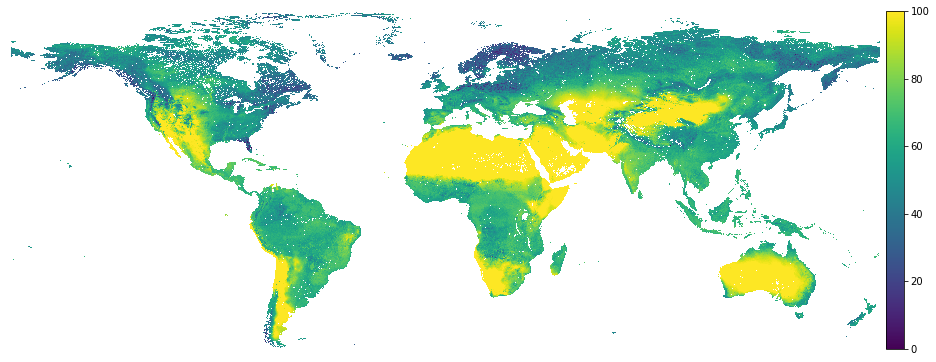

In [24]:
%%time

fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot(111)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_frame_on(False)

im = ax1.imshow(ts_perc)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="2%", pad=0.1)
norm = matplotlib.colors.Normalize(vmin=0, vmax=100, clip=False)
plt.colorbar(im, cax=cax1, norm=norm);

plt.savefig(os.path.join(out_dir, 'perc_impact_ts_potato.png'),
            dpi=300, bbox_inches='tight', pad_inches=0.1)

CPU times: user 33.4 s, sys: 10.9 s, total: 44.3 s
Wall time: 44.3 s


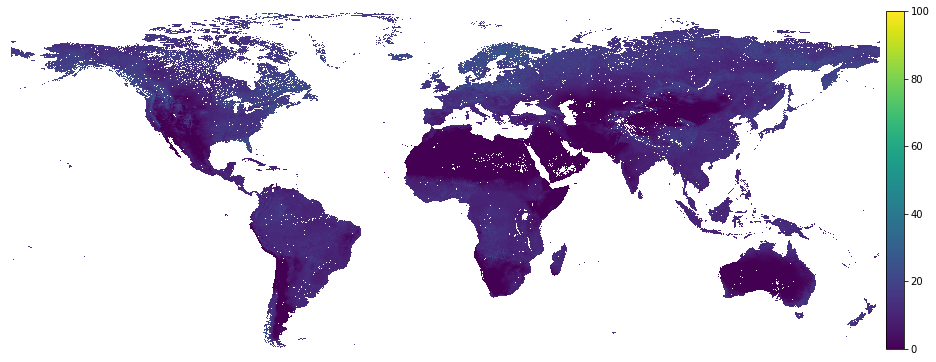

In [25]:
%%time

fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot(111)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_frame_on(False)

im = ax1.imshow(ms_perc)
im.set_clim(vmin=0, vmax=100)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="2%", pad=0.1)
plt.colorbar(im, cax=cax1);

plt.savefig(os.path.join(out_dir, 'perc_impact_ms_potato.png'),
            dpi=300, bbox_inches='tight', pad_inches=0.1)

CPU times: user 33.8 s, sys: 11.3 s, total: 45.2 s
Wall time: 45.1 s


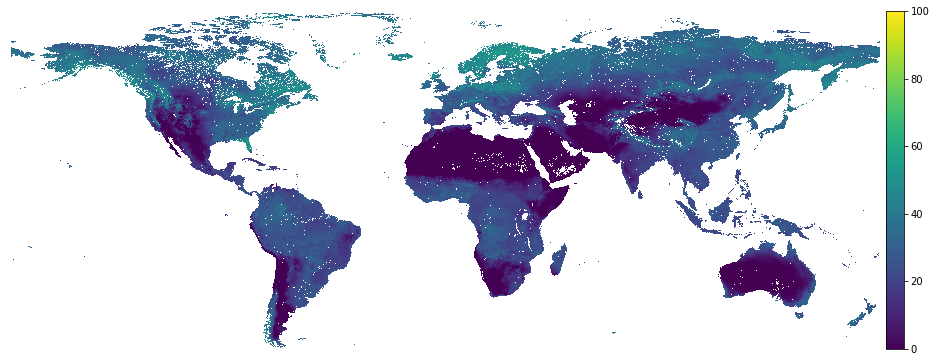

In [26]:
%%time

fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot(111)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_frame_on(False)

im = ax1.imshow(bs_perc)
im.set_clim(vmin=0, vmax=100)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="2%", pad=0.1);
plt.colorbar(im, cax=cax1);

plt.savefig(os.path.join(out_dir, 'perc_impact_bs_potato.png'),
            dpi=300, bbox_inches='tight', pad_inches=0.1)

In [27]:
np.nanmax(bs_perc)

78.585991